In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot
import yfinance as yf
import seaborn as sn
from datetime import datetime
from fastquant import get_crypto_data
from fastquant import get_stock_data
from matplotlib import pyplot
from pandas_datareader import data as pdr
import cufflinks as cf

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

now = datetime.today().strftime('%Y-%m-%d')
print('current date: ', now)

BTC = get_crypto_data("BTC/USDT", "2020-01-01", now) 
print('1/16 done')
LINK = get_crypto_data("LINK/USDT", "2020-01-01", now) 
print('2/16 done')
ZRX = get_crypto_data("ZRX/USDT", "2020-01-01", now) 
print('3/16 done')
YFI = get_crypto_data("YFI/USDT", "2020-01-01", now) 
print('4/16 done')
UNI = get_crypto_data("UNI/USDT", "2020-01-01", now) 
print('5/16 done')
OMG = get_crypto_data("OMG/USDT", "2020-01-01", now) 
print('6/16 done')
ETH = get_crypto_data("ETH/USDT", "2020-01-01", now)
print('7/16 done')
XRP = get_crypto_data("XRP/USDT", "2020-01-01", now)
print('8/16 done')
LTC = get_crypto_data("LTC/USDT", "2020-01-01", now)
print('9/16 done')
COMP = get_crypto_data("COMP/USDT", "2020-01-01", now)
print('10/16 done')
BNB = get_crypto_data("BNB/USDT", "2020-01-01", now)
print('11/16 done')
SUSHI = get_crypto_data("SUSHI/USDT", "2020-01-01", now)
print('12/16 done')
TRX = get_crypto_data("TRX/USDT", "2020-01-01", now)
print('13/16 done')
BAND = get_crypto_data("BAND/USDT", "2020-01-01", now)
print('14/16 done')
EOS = get_crypto_data("EOS/USDT", "2020-01-01", now)
print('15/16 done')
ZEC = get_crypto_data("ZEC/USDT", "2020-01-01", now)
print('16/16 done')

BTC = BTC.reset_index()
LINK = LINK.reset_index()
ZRX = ZRX.reset_index()
YFI = YFI.reset_index()
UNI = UNI.reset_index()
OMG = OMG.reset_index()
ETH = ETH.reset_index()
XRP = XRP.reset_index()
LTC = LTC.reset_index()
COMP = COMP.reset_index()
BNB = BNB.reset_index()
SUSHI = SUSHI.reset_index()
TRX = TRX.reset_index()
BAND = BAND.reset_index()
EOS = EOS.reset_index()
ZEC = ZEC.reset_index()

print('btc: ', BTC.head())

BTC = BTC[['dt','close']].rename(columns={"dt": "Date", "close": "btc_close"})
LINK = LINK[['dt','close']].rename(columns={"dt": "Date", "close": "link_close"})
ZRX = ZRX[['dt','close']].rename(columns={"dt": "Date", "close": "zrx_close"})
YFI = YFI[['dt','close']].rename(columns={"dt": "Date", "close": "yfi_close"})
UNI = UNI[['dt','close']].rename(columns={"dt": "Date", "close": "uni_close"})
OMG = OMG[['dt','close']].rename(columns={"dt": "Date", "close": "omg_close"})
ETH = ETH[['dt','close']].rename(columns={"dt": "Date", "close": "eth_close"})
XRP = XRP[['dt','close']].rename(columns={"dt": "Date", "close": "xrp_close"})
LTC = LTC[['dt','close']].rename(columns={"dt": "Date", "close": "ltc_close"})
COMP = COMP[['dt','close']].rename(columns={"dt": "Date", "close": "comp_close"})
BNB = BNB[['dt','close']].rename(columns={"dt": "Date", "close": "bnb_close"})
SUSHI = SUSHI[['dt','close']].rename(columns={"dt": "Date", "close": "sushi_close"})
TRX = TRX[['dt','close']].rename(columns={"dt": "Date", "close": "trx_close"})
BAND = BAND[['dt','close']].rename(columns={"dt": "Date", "close": "band_close"})
EOS = EOS[['dt','close']].rename(columns={"dt": "Date", "close": "eos_close"})
ZEC = ZEC[['dt','close']].rename(columns={"dt": "Date", "close": "zec_close"})

print('btc: \n ', BTC.head())

df = pd.merge(BTC, LINK, on='Date', how='left')
df = pd.merge(df, ZRX, on='Date', how='left')
df = pd.merge(df, YFI, on='Date', how='left')
df = pd.merge(df, UNI, on='Date', how='left')
df = pd.merge(df, OMG, on='Date', how='left')
df = pd.merge(df, ETH, on='Date', how='left')
df = pd.merge(df, XRP, on='Date', how='left')
df = pd.merge(df, LTC, on='Date', how='left')
df = pd.merge(df, COMP, on='Date', how='left')
df = pd.merge(df, BNB, on='Date', how='left')
df = pd.merge(df, SUSHI, on='Date', how='left')
df = pd.merge(df, TRX, on='Date', how='left')
df = pd.merge(df, BAND, on='Date', how='left')
df = pd.merge(df, EOS, on='Date', how='left')
df = pd.merge(df, ZEC, on='Date', how='left')

print(df.info)

#rsi function
def computeRSI (data, time_window):
    diff = data.diff(1).dropna() # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg = up_chg.ewm(com=time_window-1, min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1, min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

df['btc_close'] = computeRSI(df['btc_close'], 14)
df['link_close'] = computeRSI(df['link_close'], 14)
df['zrx_close'] = computeRSI(df['zrx_close'], 14)
df['yfi_close'] = computeRSI(df['yfi_close'], 14)
df['uni_close'] = computeRSI(df['uni_close'], 14)
df['omg_close'] = computeRSI(df['omg_close'], 14)
df['eth_close'] = computeRSI(df['eth_close'], 14)
df['xrp_close'] = computeRSI(df['xrp_close'], 14)
df['ltc_close'] = computeRSI(df['ltc_close'], 14)
df['comp_close'] = computeRSI(df['comp_close'], 14)
df['bnb_close'] = computeRSI(df['bnb_close'], 14)
df['sushi_close'] = computeRSI(df['sushi_close'], 14)
df['trx_close'] = computeRSI(df['trx_close'], 14)
df['band_close'] = computeRSI(df['band_close'], 14)
df['eos_close'] = computeRSI(df['eos_close'], 14)
df['zec_close'] = computeRSI(df['zec_close'], 14)

df['low'] = 30
df['high'] = 70
df.head(20)

#plot
fig = go.Figure()

#create lines/traces
fig.add_trace(go.Scatter(x=df['Date'], y=df['btc_close'],
                    mode='lines',
                    name='BTC',
                    line=dict(color="Silver", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['link_close'],
                    mode='lines',
                    name='LINK',
                    line=dict(color="orange", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['zrx_close'],
                    mode='lines',
                    name='ZRX',
                    line=dict(color="royalblue", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['yfi_close'],
                    mode='lines',
                    name='YFI',
                    line=dict(color="LightGreen", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['uni_close'],
                    mode='lines',
                    name='UNI',
                    line=dict(color="MediumPurple", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['omg_close'],
                    mode='lines',
                    name='OMG',
                    line=dict(color="Red", width=1),))

fig.add_trace(go.Scatter(x=df['Date'], y=df['eth_close'],
                    mode='lines',
                    name='ETH',
                    line=dict(color="Aqua", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['xrp_close'],
                    mode='lines',
                    name='XRP',
                    line=dict(color="Black", width=3),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['ltc_close'],
                    mode='lines',
                    name='LTC',
                    line=dict(color="Yellow", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['comp_close'],
                    mode='lines',
                    name='COMP',
                    line=dict(color="lightseagreen", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['bnb_close'],
                    mode='lines',
                    name='BNB',
                    line=dict(color="darkturquoise", width=1),))

fig.add_trace(go.Scatter(x=df['Date'], y=df['sushi_close'],
                    mode='lines',
                    name='SUSHI',
                    line=dict(color="slateblue", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['trx_close'],
                    mode='lines',
                    name='TRX',
                    line=dict(color="firebrick", width=1),))

fig.add_trace(go.Scatter(x=df['Date'], y=df['band_close'],
                    mode='lines',
                    name='BAND',
                    line=dict(color="turquoise", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['eos_close'],
                    mode='lines',
                    name='EOS',
                    line=dict(color="olivedrab", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['zec_close'],
                    mode='lines',
                    name='ZEC',
                    line=dict(color="maroon", width=1),))

fig.add_trace(go.Scatter(x=df['Date'], y=df['high'],
                         fill=None,
                         mode='lines',
                         line=dict(width=0.5, color='rgb(222, 196, 255)', dash='dash')))
fig.add_trace(go.Scatter(x=df['Date'],y=df['low'],
                         fill='tonexty', # fill area between trace0 and trace1
                         mode='lines',
                         line=dict(width=0.5, color='rgb(222, 196, 255)', dash='dash')))

#update axis ticks
fig.update_yaxes(nticks=30,showgrid=True)
fig.update_xaxes(nticks=12,showgrid=True)

#update layout
fig.update_layout(title="<b>Daily RSI</b>"
                 , height = 700
                 , xaxis_title='Date'
                 , yaxis_title='Relative Strength Index'
                 , template = "plotly" #['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', 'plotly_dark']
                 )

#update legend
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.show()

current date:  2021-02-26
1/16 done
2/16 done
3/16 done
4/16 done
5/16 done
6/16 done
7/16 done
8/16 done
9/16 done
10/16 done
11/16 done
12/16 done
13/16 done
14/16 done
15/16 done
16/16 done
btc:            dt     open     high      low    close        volume
0 2020-01-02  7200.77  7212.50  6924.74  6965.71  31951.483932
1 2020-01-03  6965.49  7405.00  6871.04  7344.96  68428.500451
2 2020-01-04  7345.00  7404.00  7272.21  7354.11  29987.974977
3 2020-01-05  7354.19  7495.00  7318.00  7358.75  38331.085604
4 2020-01-06  7357.64  7795.34  7346.76  7758.00  54635.695316
btc: 
          Date  btc_close
0 2020-01-02    6965.71
1 2020-01-03    7344.96
2 2020-01-04    7354.11
3 2020-01-05    7358.75
4 2020-01-06    7758.00
<bound method DataFrame.info of           Date  btc_close  link_close  zrx_close  yfi_close  uni_close  \
0   2020-01-02    6965.71      1.7366     0.1752        NaN        NaN   
1   2020-01-03    7344.96      1.8040     0.1821        NaN        NaN   
2   2020-01-04   

In [2]:
#make df again
df = pd.merge(BTC, LINK, on='Date', how='left')
df = pd.merge(df, ZRX, on='Date', how='left')
df = pd.merge(df, YFI, on='Date', how='left')
df = pd.merge(df, UNI, on='Date', how='left')
df = pd.merge(df, OMG, on='Date', how='left')
df = pd.merge(df, ETH, on='Date', how='left')
df = pd.merge(df, XRP, on='Date', how='left')
df = pd.merge(df, LTC, on='Date', how='left')
df = pd.merge(df, COMP, on='Date', how='left')
df = pd.merge(df, BNB, on='Date', how='left')
df = pd.merge(df, SUSHI, on='Date', how='left')
df = pd.merge(df, TRX, on='Date', how='left')
df = pd.merge(df, BAND, on='Date', how='left')
df = pd.merge(df, EOS, on='Date', how='left')
df = pd.merge(df, ZEC, on='Date', how='left')

df.head()

,Date,btc_close,link_close,zrx_close,yfi_close,uni_close,omg_close,eth_close,xrp_close,ltc_close,comp_close,bnb_close,sushi_close,trx_close,band_close,eos_close,zec_close
0,2020-01-02,6965.71,1.7366,0.1752,NaN,NaN,0.5950,127.19,0.18750,39.43,NaN,13.0105,NaN,0.01284,0.2189,2.4593,27.02
1,2020-01-03,7344.96,1.8040,0.1821,NaN,NaN,0.6248,134.35,0.19338,42.23,NaN,13.6474,NaN,0.01344,0.2318,2.6396,28.41
2,2020-01-04,7354.11,1.8242,0.1864,NaN,NaN,0.6246,134.20,0.19305,42.78,NaN,13.8092,NaN,0.01344,0.2308,2.6481,29.91
3,2020-01-05,7358.75,1.7957,0.1861,NaN,NaN,0.6367,135.37,0.19453,43.30,NaN,14.0532,NaN,0.01353,0.2321,2.6865,30.81
4,2020-01-06,7758.00,1.9374,0.1958,NaN,NaN,0.6864,144.15,0.22310,45.80,NaN,14.9471,NaN,0.01472,0.2398,2.8506,32.86


In [3]:
#add columns (rsi, bollinger bands, day of week col etc)
xrp_df = pd.DataFrame(df[['Date','xrp_close']])
xrp_df['pct_change'] = round(xrp_df['xrp_close'].pct_change(periods=1),2)
xrp_df['day_of_week'] = xrp_df['Date'].dt.day_name()
xrp_df['rsi'] = computeRSI(xrp_df['xrp_close'], 14)
xrp_df['rsi_target'] = np.where(xrp_df['pct_change'] >= .07, 1, 0)

period = 20
multiplier = 2

xrp_df['UpperBand'] = xrp_df['xrp_close'].rolling(period).mean() + xrp_df['xrp_close'].rolling(period).std() * multiplier
xrp_df['LowerBand'] = xrp_df['xrp_close'].rolling(period).mean() - xrp_df['xrp_close'].rolling(period).std() * multiplier

xrp_df = xrp_df.dropna()

xrp_df

,Date,xrp_close,pct_change,day_of_week,rsi,rsi_target,UpperBand,LowerBand
19,2020-01-21,0.23726,0.02,Tuesday,66.646291,0,0.252740,0.182559
20,2020-01-22,0.23733,0.00,Wednesday,66.682174,0,0.253238,0.187044
21,2020-01-23,0.22586,-0.05,Thursday,56.042895,0,0.252431,0.191099
22,2020-01-24,0.22222,-0.02,Friday,53.144969,0,0.250754,0.195693
23,2020-01-25,0.21946,-0.01,Saturday,50.991889,0,0.248575,0.200365
...,...,...,...,...,...,...,...,...
417,2021-02-22,0.56646,0.04,Monday,60.564165,0,0.643186,0.384233
418,2021-02-23,0.47579,-0.16,Tuesday,49.292601,0,0.636569,0.398708
419,2021-02-24,0.46860,-0.02,Wednesday,48.521428,0,0.635192,0.402400
420,2021-02-25,0.43601,-0.07,Thursday,45.078854,0,0.636537,0.399437


In [24]:
cf.set_config_file(theme='pearl',sharing='public',offline=True)

qf=cf.QuantFig(XRP,title='XRP',legend='right',name='XRP')
qf.add_bollinger_bands()
qf.add_volume()
qf.add_macd()
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
qf.add_sma([10,20],width=2,color=['green','lightgreen'],legendgroup=True)
qf.add_rsi(periods=20,color='purple')

# qf.add_adx()
# qf.add_cci()
# qf.add_dmi()
# qf.add_atr()
# qf.add_ptps()
# qf.add_ema()
# qf.add_resistance()
# qf.add_trendline(date0=now-30,date1=now)
# qf.add_support()

qf.iplot()

In [8]:
#create aggregates
sum_pct_change = xrp_df.groupby('day_of_week')['pct_change'].sum().reset_index()
avg_pct_change = xrp_df.groupby('day_of_week')['pct_change'].mean().reset_index()
min_pct_change = xrp_df.groupby('day_of_week')['pct_change'].min().reset_index()
max_pct_change = xrp_df.groupby('day_of_week')['pct_change'].max().reset_index()

print('sum_pct_change: \n\n', sum_pct_change)
print('avg_pct_change: \n\n', avg_pct_change)
print('min_pct_change: \n\n', min_pct_change)
print('max_pct_change: \n\n', max_pct_change)

sum_pct_change: 

   day_of_week  pct_change
0      Friday        0.46
1      Monday        0.40
2    Saturday        0.91
3      Sunday       -0.27
4    Thursday        0.45
5     Tuesday       -0.31
6   Wednesday       -0.03
avg_pct_change: 

   day_of_week  pct_change
0      Friday    0.007931
1      Monday    0.007018
2    Saturday    0.015965
3      Sunday   -0.004737
4    Thursday    0.007759
5     Tuesday   -0.005345
6   Wednesday   -0.000517
min_pct_change: 

   day_of_week  pct_change
0      Friday       -0.12
1      Monday       -0.25
2    Saturday       -0.09
3      Sunday       -0.14
4    Thursday       -0.35
5     Tuesday       -0.16
6   Wednesday       -0.42
max_pct_change: 

   day_of_week  pct_change
0      Friday        0.17
1      Monday        0.38
2    Saturday        0.57
3      Sunday        0.12
4    Thursday        0.30
5     Tuesday        0.13
6   Wednesday        0.22


In [9]:
fig = px.bar(xrp_df, x="day_of_week"
             , y="pct_change"
             , color="pct_change"
             , category_orders={"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]}
             , color_continuous_scale="RdBu"
             , template="plotly_dark"
             , title="XRP Pct Changes by Day of Week")
fig.show()

xrp_agg = pd.merge(sum_pct_change, avg_pct_change, on='day_of_week', how='left')
xrp_agg = pd.merge(xrp_agg, min_pct_change, on='day_of_week', how='left')
xrp_agg = pd.merge(xrp_agg, max_pct_change, on='day_of_week', how='left')
xrp_agg.columns = ['day_of_week','sum_pct_change','avg_pct_change','min_pct_change','max_pct_change']
xrp_agg

custom_dict = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6} 
xrp_agg = xrp_agg.sort_values(by=['day_of_week'], key=lambda x: x.map(custom_dict))
xrp_agg

fig = go.Figure()

fig.add_trace(go.Bar(x=xrp_agg.day_of_week, y=xrp_agg.sum_pct_change,
                    name='sum_pct_change'))
fig.add_trace(go.Bar(x=xrp_agg.day_of_week, y=xrp_agg.avg_pct_change,
                    name='avg_pct_change'))
fig.add_trace(go.Bar(x=xrp_agg.day_of_week
                     , y=xrp_agg.min_pct_change
                    , name='min_pct_change'))
fig.add_trace(go.Bar(x=xrp_agg.day_of_week, y=xrp_agg.max_pct_change,
                    name='max_pct_change'))

fig.update_layout(title='XRP Aggregate Metrics',
                   template='plotly_dark',
                   xaxis_title='Day of Week',
                   yaxis_title='Percent')

fig.show()

# Machine Learning

In [10]:
#drop date columns, drop nulls
xrp_df = xrp_df.drop(['day_of_week','Date'],axis=1)
xrp_df = xrp_df.dropna()
xrp_df

,xrp_close,pct_change,rsi,rsi_target,UpperBand,LowerBand
19,0.23726,0.02,66.646291,0,0.252740,0.182559
20,0.23733,0.00,66.682174,0,0.253238,0.187044
21,0.22586,-0.05,56.042895,0,0.252431,0.191099
22,0.22222,-0.02,53.144969,0,0.250754,0.195693
23,0.21946,-0.01,50.991889,0,0.248575,0.200365
...,...,...,...,...,...,...
417,0.56646,0.04,60.564165,0,0.643186,0.384233
418,0.47579,-0.16,49.292601,0,0.636569,0.398708
419,0.46860,-0.02,48.521428,0,0.635192,0.402400
420,0.43601,-0.07,45.078854,0,0.636537,0.399437


Box and Whisker Plots


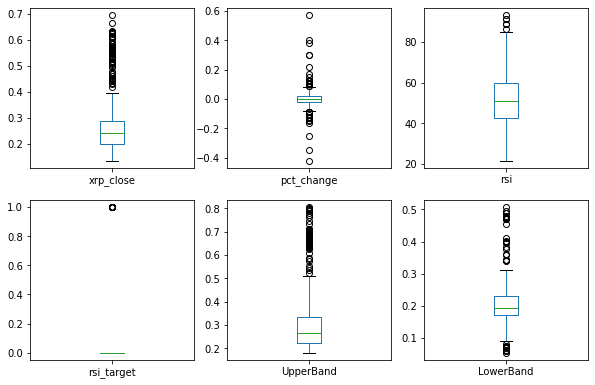

Histogram plots


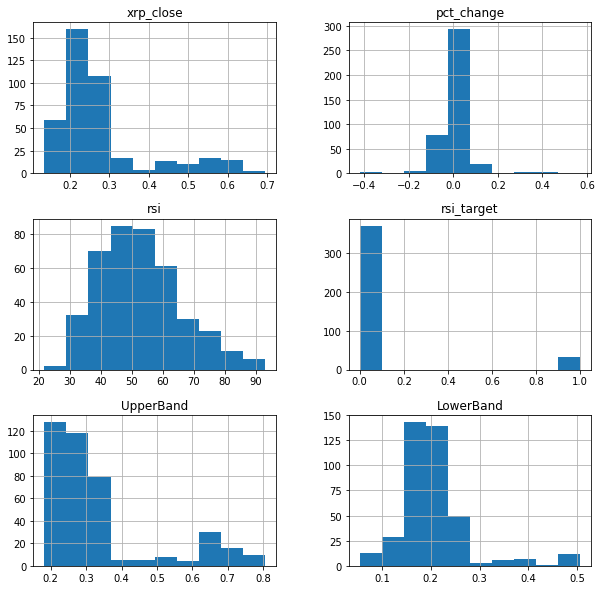

Scatter Plot Matrix


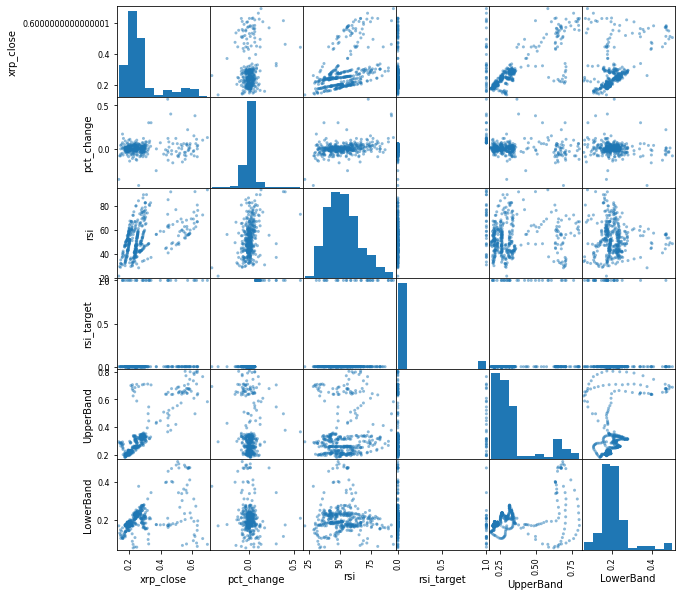

In [11]:
#show histogram and univariate plots

# box and whisker plots
print('Box and Whisker Plots')
xrp_df.plot(kind='box'
            , subplots=True
            , layout=(3,3)
            , sharex=False
            , sharey=False
            , figsize=(10,10)
           )
pyplot.show()

#histogram
print('Histogram plots')
xrp_df.hist(figsize=(10,10))
pyplot.show()

# scatter plot matrix
print('Scatter Plot Matrix')
pd.plotting.scatter_matrix(xrp_df
                           ,figsize=(10,10))
pyplot.show()

Accuracy:  0.889


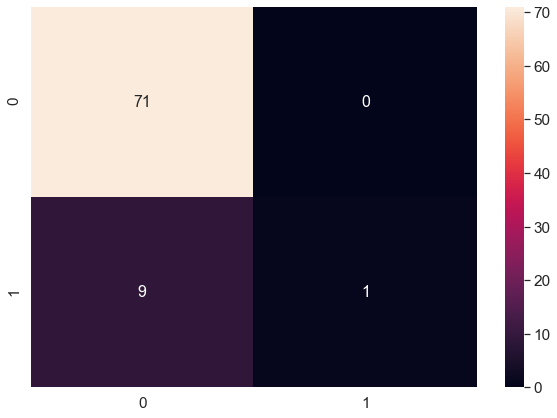

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        71
         1.0       1.00      0.10      0.18        10

    accuracy                           0.89        81
   macro avg       0.94      0.55      0.56        81
weighted avg       0.90      0.89      0.85        81



In [12]:
# Split-out validation dataset
array = xrp_df.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print('Accuracy: ', round(accuracy_score(Y_validation, predictions),3))

cm1 = confusion_matrix(Y_validation, predictions)
df_cm = pd.DataFrame(cm1, range(len(cm1)), range(len(cm1)))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

print(classification_report(Y_validation, predictions))

GaussianNB() Accuracy:  0.914
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        71
         1.0       1.00      0.30      0.46        10

    accuracy                           0.91        81
   macro avg       0.96      0.65      0.71        81
weighted avg       0.92      0.91      0.89        81

LogisticRegression(multi_class='ovr', solver='liblinear') Accuracy:  0.877
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93        71
         1.0       0.00      0.00      0.00        10

    accuracy                           0.88        81
   macro avg       0.44      0.50      0.47        81
weighted avg       0.77      0.88      0.82        81

KNeighborsClassifier() Accuracy:  0.889
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        71
         1.0       1.00      0.10      0.18        10

    accuracy                         

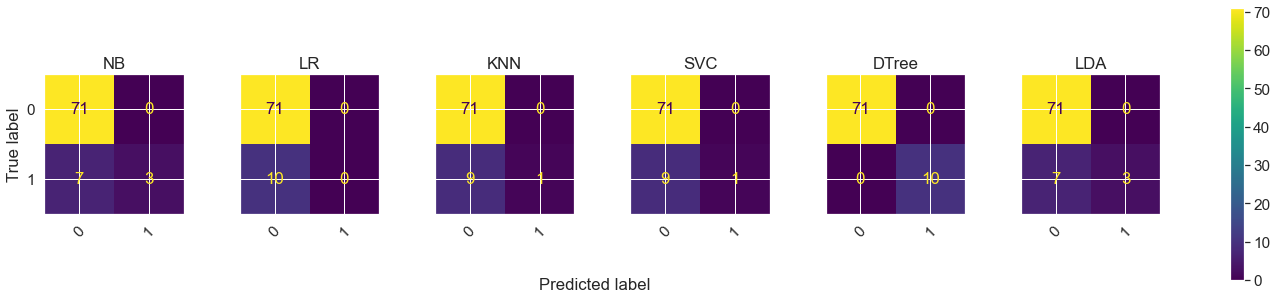

In [13]:
classifiers = {
    "NB": GaussianNB(),
    "LR": LogisticRegression(solver='liblinear', multi_class='ovr'),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(gamma='auto'),
    "DTree": DecisionTreeClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
}

f, axes = plt.subplots(1, 6, figsize=(25, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    Y_pred = classifier.fit(X_train, Y_train)
    predictions = classifier.predict(X_validation)
    cf_matrix = confusion_matrix(Y_validation, predictions)

#     df_cm = pd.DataFrame(cf_matrix, range(len(cm1)), range(len(cm1)))
#     plt.figure(figsize=(5,4))
#     sn.set(font_scale=1.4) # for label size
#     sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    
    disp = ConfusionMatrixDisplay(cf_matrix
#                                   , display_labels=names
                                 )
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')
    print(classifier, 'Accuracy: ', round(accuracy_score(Y_validation, predictions),3))
    print(classification_report(Y_validation, predictions))

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)
print('')
print('Confusion Matrices')
f.colorbar(disp.im_, ax=axes)
plt.show()

LR: 0.932000 (0.011000)
LDA: 0.960000 (0.027000)
KNN: 0.944000 (0.012000)
DTREE: 1.000000 (0.000000)
NB: 0.954000 (0.029000)
SVM: 0.938000 (0.013000)


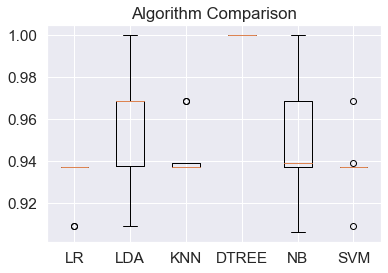

In [14]:
# multiple predictions
# compare algorithms

# Split-out validation dataset
array = xrp_df.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTREE', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, round(cv_results.mean(),3), round(cv_results.std(),3)))

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [15]:
x_data = names

y0 = results[0]
y1 = results[1]
y2 = results[2]
y3 = results[3]
y4 = results[4]
y5 = results[5]

y_data = [y0, y1, y2, y3, y4, y5]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=5,
            line_width=1)
        )

fig.update_layout(
    title='Accuracy of Classification Models for XRP Price Prediction',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=.01,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False,
)

fig.show()

# Testing

In [ ]:
# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band
for item in (df):
    item['30 Day MA'] = item['Adj Close'].rolling(window=20).mean()
    
    # set .std(ddof=0) for population std instead of sample
    item['30 Day STD'] = item['Adj Close'].rolling(window=20).std() 
    
    item['Upper Band'] = item['30 Day MA'] + (item['30 Day STD'] * 2)
    item['Lower Band'] = item['30 Day MA'] - (item['30 Day STD'] * 2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB

label_enconder = LabelEncoder()

model_name = 'Naive Bayes Classifier'
nbClassifier = MultinaomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nb_model = Pipeline(steps=[('preprocessor', preprocessorForFeatures),('classifier',nbClassifier)])

nb_model.fit(X_train,y_train)
y_pred_nb=nb_model.predict(X_test)

y_test = label_enconder.inverse_transform(y_test)
y_pred_nb = label_encoder.inverse_transfor(y_pred_nb)
model_metrics(y_test, y_pred_nb)

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def importdata(): #Importing data
    balance_data=(xrp_df)
    print(len(balance_data))
    print(balance_data.shape)
    print(balance_data.head())
    return balance_data

def splitdataset(balance_data): #Splitting data
    x=balance_data.values[:,1:5]
    y=balance_data.values[:,0]
    x_train,x_test,y_train,y_test=train_test_split(
        x,y,test_size=0.3,random_state=100)
    return x,y,x_train,x_test,y_train,y_test

def train_using_gini(x_train,x_test,y_train): #Training with giniIndex
    clf_gini = DecisionTreeClassifier(criterion = "gini",
                                      random_state = 100,max_depth=3, min_samples_leaf=5)
    clf_gini.fit(x_train,y_train)
    return clf_gini

def train_using_entropy(x_train,x_test,y_train): #Training with entropy
    clf_entropy=DecisionTreeClassifier(
        criterion = "entropy", random_state = 100,
        max_depth = 3, min_samples_leaf = 5)
    clf_entropy.fit(x_train,y_train)
    return clf_entropy

def prediction(x_test,clf_object): #Making predictions
    y_pred=clf_object.predict(x_test)
    print(f"Predicted values: {y_pred}")
    return y_pred

def cal_accuracy(y_test,y_pred): #Calculating accuracy
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred)*100)
    print(classification_report(y_test,y_pred))
    
data=importdata()

406
(406, 4)
    xrp_close  pct_change        rsi  rsi_target
14    0.22900       -0.02  68.905717           0
15    0.23921        0.04  73.339861           0
16    0.24357        0.02  74.980643           0
17    0.23558       -0.03  66.859844           0
18    0.23314       -0.01  64.560294           0


In [109]:
x,y,x_train,x_test,y_train,y_test=splitdataset(xrp_df)
clf_gini=train_using_gini(x_train,x_test,y_train)
clf_entropy=train_using_entropy(x_train,x_test,y_train)
y_pred_gini=prediction(x_test,clf_gini)

ValueError: Unknown label type: 'continuous'

In [ ]:
from fastquant import get_stock_data
from fastquant import get_crypto_data
from pandas_datareader import data as pdr
import yfinance as yf
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime

In [25]:
now = datetime.today().strftime('%Y-%m-%d')

BTC = get_crypto_data("BTC/USDT", "2020-01-01", now) 
print('1/16 done')
LINK = get_crypto_data("LINK/USDT", "2020-01-01", now) 
print('2/16 done')
ZRX = get_crypto_data("ZRX/USDT", "2020-01-01", now) 
print('3/16 done')
YFI = get_crypto_data("YFI/USDT", "2020-01-01", now) 
print('4/16 done')
UNI = get_crypto_data("UNI/USDT", "2020-01-01", now) 
print('5/16 done')
OMG = get_crypto_data("OMG/USDT", "2020-01-01", now) 
print('6/16 done')
ETH = get_crypto_data("ETH/USDT", "2020-01-01", now)
print('7/16 done')
XRP = get_crypto_data("XRP/USDT", "2020-01-01", now)
print('8/16 done')
LTC = get_crypto_data("LTC/USDT", "2020-01-01", now)
print('9/16 done')
COMP = get_crypto_data("COMP/USDT", "2020-01-01", now)
print('10/16 done')
BNB = get_crypto_data("BNB/USDT", "2020-01-01", now)
print('11/16 done')
SUSHI = get_crypto_data("SUSHI/USDT", "2020-01-01", now)
print('12/16 done')
TRX = get_crypto_data("TRX/USDT", "2020-01-01", now)
print('13/16 done')
BAND = get_crypto_data("BAND/USDT", "2020-01-01", now)
print('14/16 done')
EOS = get_crypto_data("EOS/USDT", "2020-01-01", now)
print('15/16 done')
ZEC = get_crypto_data("ZEC/USDT", "2020-01-01", now)
print('16/16 done')

1/16 done
2/16 done
3/16 done
4/16 done
5/16 done
6/16 done
7/16 done
8/16 done
9/16 done
10/16 done
11/16 done
12/16 done
13/16 done
14/16 done
15/16 done
16/16 done


In [26]:
BTC = BTC.reset_index()
LINK = LINK.reset_index()
ZRX = ZRX.reset_index()
YFI = YFI.reset_index()
UNI = UNI.reset_index()
OMG = OMG.reset_index()
ETH = ETH.reset_index()
XRP = XRP.reset_index()
LTC = LTC.reset_index()
COMP = COMP.reset_index()
BNB = BNB.reset_index()
SUSHI = SUSHI.reset_index()
TRX = TRX.reset_index()
BAND = BAND.reset_index()
EOS = EOS.reset_index()
ZEC = ZEC.reset_index()

print('btc: ', BTC.head())

btc:            dt     open     high      low    close        volume
0 2020-01-02  7200.77  7212.50  6924.74  6965.71  31951.483932
1 2020-01-03  6965.49  7405.00  6871.04  7344.96  68428.500451
2 2020-01-04  7345.00  7404.00  7272.21  7354.11  29987.974977
3 2020-01-05  7354.19  7495.00  7318.00  7358.75  38331.085604
4 2020-01-06  7357.64  7795.34  7346.76  7758.00  54635.695316


In [28]:
BTC = BTC[['dt','close']].rename(columns={"dt": "Date", "close": "btc_close"})
LINK = LINK[['dt','close']].rename(columns={"dt": "Date", "close": "link_close"})
ZRX = ZRX[['dt','close']].rename(columns={"dt": "Date", "close": "zrx_close"})
YFI = YFI[['dt','close']].rename(columns={"dt": "Date", "close": "yfi_close"})
UNI = UNI[['dt','close']].rename(columns={"dt": "Date", "close": "uni_close"})
OMG = OMG[['dt','close']].rename(columns={"dt": "Date", "close": "omg_close"})
ETH = ETH[['dt','close']].rename(columns={"dt": "Date", "close": "eth_close"})
XRP = XRP[['dt','close']].rename(columns={"dt": "Date", "close": "xrp_close"})
LTC = LTC[['dt','close']].rename(columns={"dt": "Date", "close": "ltc_close"})
COMP = COMP[['dt','close']].rename(columns={"dt": "Date", "close": "comp_close"})
BNB = BNB[['dt','close']].rename(columns={"dt": "Date", "close": "bnb_close"})
SUSHI = SUSHI[['dt','close']].rename(columns={"dt": "Date", "close": "sushi_close"})
TRX = TRX[['dt','close']].rename(columns={"dt": "Date", "close": "trx_close"})
BAND = BAND[['dt','close']].rename(columns={"dt": "Date", "close": "band_close"})
EOS = EOS[['dt','close']].rename(columns={"dt": "Date", "close": "eos_close"})
ZEC = ZEC[['dt','close']].rename(columns={"dt": "Date", "close": "zec_close"})

print('btc: \n ', BTC.head())

btc: 
          Date  btc_close
0 2020-01-02    6965.71
1 2020-01-03    7344.96
2 2020-01-04    7354.11
3 2020-01-05    7358.75
4 2020-01-06    7758.00


In [35]:
df = pd.merge(BTC, LINK, on='Date', how='left')
df = pd.merge(df, ZRX, on='Date', how='left')
df = pd.merge(df, YFI, on='Date', how='left')
df = pd.merge(df, UNI, on='Date', how='left')
df = pd.merge(df, OMG, on='Date', how='left')
df = pd.merge(df, ETH, on='Date', how='left')
df = pd.merge(df, XRP, on='Date', how='left')
df = pd.merge(df, LTC, on='Date', how='left')
df = pd.merge(df, COMP, on='Date', how='left')
df = pd.merge(df, BNB, on='Date', how='left')
df = pd.merge(df, SUSHI, on='Date', how='left')
df = pd.merge(df, TRX, on='Date', how='left')
df = pd.merge(df, BAND, on='Date', how='left')
df = pd.merge(df, EOS, on='Date', how='left')
df = pd.merge(df, ZEC, on='Date', how='left')

print(df.info)

<bound method DataFrame.info of           Date  btc_close  link_close  zrx_close  yfi_close  uni_close  \
0   2020-01-02    6965.71      1.7366     0.1752        NaN        NaN   
1   2020-01-03    7344.96      1.8040     0.1821        NaN        NaN   
2   2020-01-04    7354.11      1.8242     0.1864        NaN        NaN   
3   2020-01-05    7358.75      1.7957     0.1861        NaN        NaN   
4   2020-01-06    7758.00      1.9374     0.1958        NaN        NaN   
..         ...        ...         ...        ...        ...        ...   
314 2020-11-11   15684.24     12.7530     0.3651   16679.56     2.9308   
315 2020-11-12   16291.86     12.4038     0.3605   15462.62     2.9582   
316 2020-11-13   16320.70     12.8687     0.3864   17881.06     3.8614   
317 2020-11-14   16070.45     12.5574     0.3741   17217.05     3.8165   
318 2020-11-15   15957.00     12.1192     0.3592   17606.90     3.8458   

     omg_close  eth_close  xrp_close  ltc_close  comp_close  bnb_close  \
0    

In [29]:
#rsi function
def computeRSI (data, time_window):
    diff = data.diff(1).dropna() # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg = up_chg.ewm(com=time_window-1, min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1, min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [37]:
df['btc_close'] = computeRSI(df['btc_close'], 14)
df['link_close'] = computeRSI(df['link_close'], 14)
df['zrx_close'] = computeRSI(df['zrx_close'], 14)
df['yfi_close'] = computeRSI(df['yfi_close'], 14)
df['uni_close'] = computeRSI(df['uni_close'], 14)
df['omg_close'] = computeRSI(df['omg_close'], 14)
df['eth_close'] = computeRSI(df['eth_close'], 14)
df['xrp_close'] = computeRSI(df['xrp_close'], 14)
df['ltc_close'] = computeRSI(df['ltc_close'], 14)
df['comp_close'] = computeRSI(df['comp_close'], 14)
df['bnb_close'] = computeRSI(df['bnb_close'], 14)
df['sushi_close'] = computeRSI(df['sushi_close'], 14)
df['trx_close'] = computeRSI(df['trx_close'], 14)
df['band_close'] = computeRSI(df['band_close'], 14)
df['eos_close'] = computeRSI(df['eos_close'], 14)
df['zec_close'] = computeRSI(df['zec_close'], 14)

df['low'] = 30
df['high'] = 70
df.head(20)

#plot
fig = go.Figure()

#create lines/traces
fig.add_trace(go.Scatter(x=df['Date'], y=df['btc_close'],
                    mode='lines',
                    name='BTC',
                    line=dict(color="Silver", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['link_close'],
                    mode='lines',
                    name='LINK',
                    line=dict(color="orange", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['zrx_close'],
                    mode='lines',
                    name='ZRX',
                    line=dict(color="royalblue", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['yfi_close'],
                    mode='lines',
                    name='YFI',
                    line=dict(color="LightGreen", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['uni_close'],
                    mode='lines',
                    name='UNI',
                    line=dict(color="MediumPurple", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['omg_close'],
                    mode='lines',
                    name='OMG',
                    line=dict(color="Red", width=1),))

fig.add_trace(go.Scatter(x=df['Date'], y=df['eth_close'],
                    mode='lines',
                    name='ETH',
                    line=dict(color="Aqua", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['xrp_close'],
                    mode='lines',
                    name='XRP',
                    line=dict(color="Gold", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['ltc_close'],
                    mode='lines',
                    name='LTC',
                    line=dict(color="Yellow", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['comp_close'],
                    mode='lines',
                    name='COMP',
                    line=dict(color="lightseagreen", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['bnb_close'],
                    mode='lines',
                    name='BNB',
                    line=dict(color="darkturquoise", width=1),))

fig.add_trace(go.Scatter(x=df['Date'], y=df['sushi_close'],
                    mode='lines',
                    name='SUSHI',
                    line=dict(color="slateblue", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['trx_close'],
                    mode='lines',
                    name='TRX',
                    line=dict(color="firebrick", width=1),))

fig.add_trace(go.Scatter(x=df['Date'], y=df['band_close'],
                    mode='lines',
                    name='BAND',
                    line=dict(color="turquoise", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['eos_close'],
                    mode='lines',
                    name='EOS',
                    line=dict(color="olivedrab", width=1),))
fig.add_trace(go.Scatter(x=df['Date'], y=df['zec_close'],
                    mode='lines',
                    name='ZEC',
                    line=dict(color="maroon", width=1),))

fig.add_trace(go.Scatter(x=df['Date'], y=df['high'],
                         fill=None,
                         mode='lines',
                         line=dict(width=0.5, color='rgb(222, 196, 255)', dash='dash')))
fig.add_trace(go.Scatter(x=df['Date'],y=df['low'],
                         fill='tonexty', # fill area between trace0 and trace1
                         mode='lines',
                         line=dict(width=0.5, color='rgb(222, 196, 255)', dash='dash')))

#update axis ticks
fig.update_yaxes(nticks=30,showgrid=True)
fig.update_xaxes(nticks=12,showgrid=True)

#update layout
fig.update_layout(title="<b>Daily RSI</b>"
                 , height = 700
                 , xaxis_title='Date'
                 , yaxis_title='Relative Strength Index'
                 , template = "plotly" #['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', 'plotly_dark']
                 )

#update legend
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.show()